<a href="https://colab.research.google.com/github/Reza-aghajari/ML2023/blob/main/MP2_Q4_Aghajari_9819583.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1B0-iLCGG-od8EE1Tgklbrps9Rn1urA7s


  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1B0-iLCGG-od8EE1Tgklbrps9Rn1urA7s
To: /content/data.csv
100% 527k/527k [00:00<00:00, 86.9MB/s]


In [2]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
city = df["city"]
city.value_counts()

# Drop the specified columns from the DataFrame
df = df.drop(['street', 'statezip', 'country'], axis=1)
dummy = ['city']
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=dummy , drop_first=True)
# Display the first few rows of the modified DataFrame
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [7]:
correlation_matrix = df.corr()['price'].sort_values(ascending=False)
correlation_matrix

price                       1.000000
sqft_living                 0.430410
sqft_above                  0.367570
bathrooms                   0.327110
view                        0.228504
sqft_basement               0.210427
bedrooms                    0.200336
floors                      0.151461
city_Mercer Island          0.140007
waterfront                  0.135648
city_Bellevue               0.134828
city_Medina                 0.129795
city_Clyde Hill             0.066867
sqft_lot                    0.050451
city_Redmond                0.047612
city_Sammamish              0.047604
city_Kirkland               0.036375
city_Seattle                0.035642
condition                   0.034915
city_Yarrow Point           0.033640
yr_built                    0.021857
city_Newcastle              0.017201
city_Woodinville            0.016361
city_Issaquah               0.016139
city_Fall City              0.012220
city_Beaux Arts Village     0.005049
city_Preston                0.000388
c

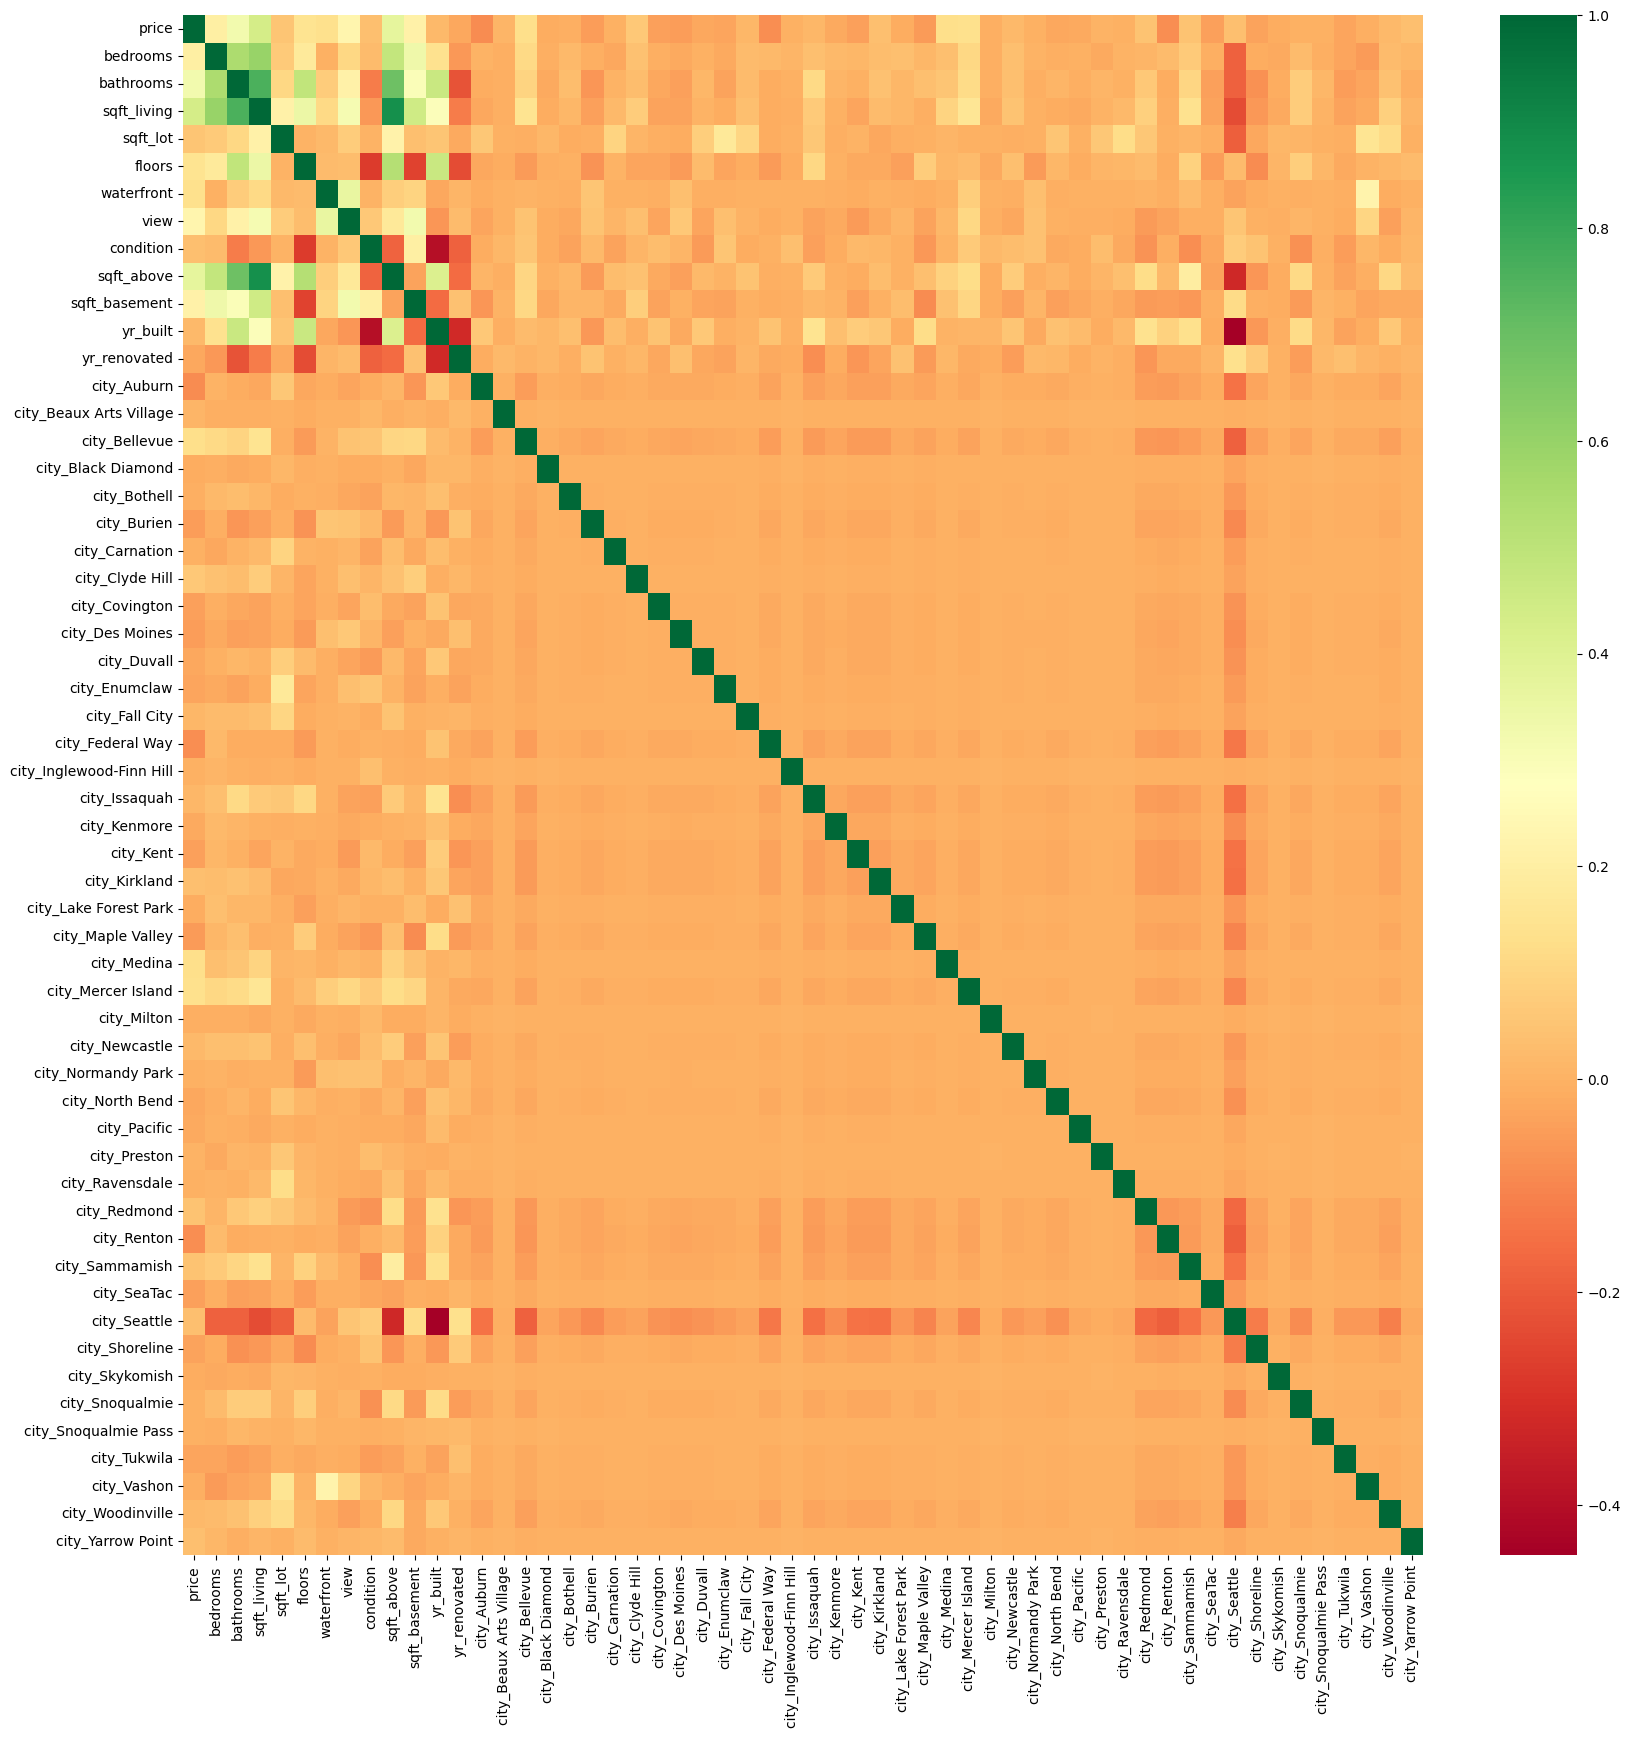

In [8]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap="RdYlGn")
plt.show()

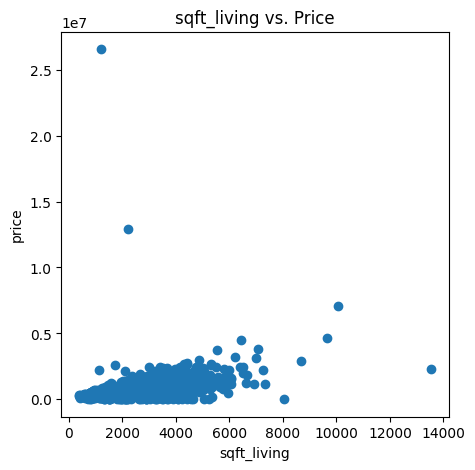

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(x='sqft_living', y='price', data=df)
plt.xlabel('sqft_living')
plt.title('sqft_living vs. Price')
plt.ylabel('price')
plt.show()

In [10]:
df[['Year', 'Month']] = df['date'].str.split('-', 1).tolist()
df = df.drop('date', axis=1)

print(df)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  ...  city_Shoreline  \
0              0     0          3        

In [11]:
df[['Month', 'x']] = df['Month'].str.split('-', 1).tolist()
df = df.drop('x', axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,Year,Month
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,1,0,0,0,0,0,0,0,2014,05
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,2014,05
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,2014,05
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,2014,05
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,2014,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,0,0,0,0,0,0,0,2014,07
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,2014,07
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,0,0,0,2014,07
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,0,0,0,0,0,0,0,2014,07


In [12]:
df = df.drop(['Year', 'Month'], axis=1)

In [27]:
X = df.drop(["price"], axis=1)  # Input data
Y = df["price"]                  # Output data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=83)

In [28]:
print("X Train Scaler : ", x_train.shape) # Print shape of x_train
print("X Test Scaler : ",  x_test.shape)  # Print shape of x_test
print("Y Train Scaler : ", y_train.shape) # Print shape of y_train
print("Y Test Scaler : ",  y_test.shape)  # Print shape of y_test

X Train Scaler :  (3680, 55)
X Test Scaler :  (920, 55)
Y Train Scaler :  (3680,)
Y Test Scaler :  (920,)


In [16]:
max_1 = y_train.values
maximum = 0
minimum = min(y_train)

# Loop through the elements of y_train
for i in range(x_train.shape[0]):
    if max_1[i] > maximum:
        maximum = max_1[i]

In [17]:
# Initialize Min-Max Scaler
scaler_1 = MinMaxScaler()

# Normalize the training input data
x_train = scaler_1.fit_transform(x_train)

# Normalize the test input data
x_test = scaler_1.transform(x_test)

In [18]:
# Convert y_train and y_test type to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

In [19]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='relu'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2800      
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4361 (17.04 KB)
Trainable params: 4361 (17.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model_2.compile(optimizer='adam', loss='mse')

history = model_2.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
295/295 [==============================] - 3s 3ms/step - loss: 0.0015 - val_loss: 7.7620e-04
Epoch 2/100
295/295 [==============================] - 1s 2ms/step - loss: 7.1256e-04 - val_loss: 1.7769e-04
Epoch 3/100
295/295 [==============================] - 1s 2ms/step - loss: 6.3153e-04 - val_loss: 1.3542e-04
Epoch 4/100
295/295 [==============================] - 1s 2ms/step - loss: 5.7699e-04 - val_loss: 1.1365e-04
Epoch 5/100
295/295 [==============================] - 1s 2ms/step - loss: 5.6328e-04 - val_loss: 1.2195e-04
Epoch 6/100
295/295 [==============================] - 1s 3ms/step - loss: 5.0242e-04 - val_loss: 9.9440e-04
Epoch 7/100
295/295 [==============================] - 2s 8ms/step - loss: 6.0116e-04 - val_loss: 1.4964e-04
Epoch 8/100
295/295 [==============================] - 1s 5ms/step - loss: 5.3336e-04 - val_loss: 1.2821e-04
Epoch 9/100
295/295 [==============================] - 2s 5ms/step - loss: 5.3066e-04 - val_loss: 1.4132e-04
Epoch 10/100
295/295 [=

In [21]:
#Evaluate the model
loss = model_2.evaluate(x_test , y_test)

29/29 [==============================] - 0s 1ms/step - loss: 1.0182e-04


In [22]:
y_pred_1 = model_2.predict(x_test)
rscore_1 = r2_score(y_test, y_pred_1)

rscore_1

29/29 [==============================] - 0s 1ms/step


0.4631732125368079

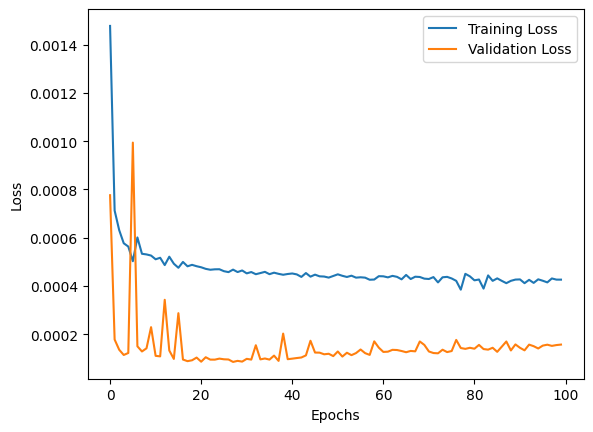

In [23]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

29/29 [==============================] - 0s 1ms/step


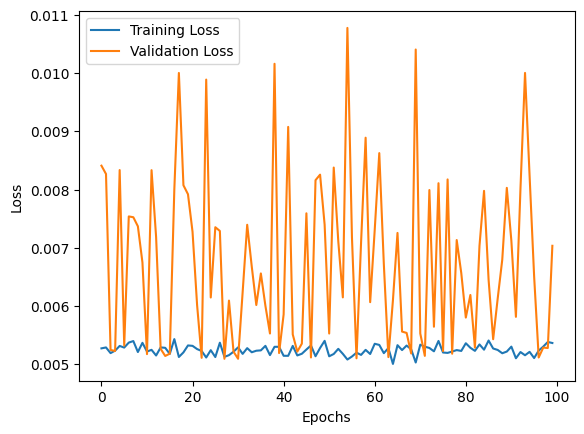

In [24]:
model_2.compile(optimizer = 'sgd',loss = 'mae')

history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,
batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)
#loss: 0.0086

y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
rscore_2
#0.1630696235488699

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

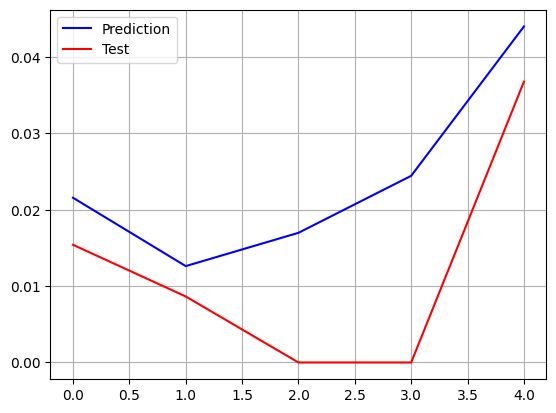

In [25]:
import random

random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_2) - 1) # Generate a random index
  random_pred.append(y_pred_2[j]) # Append y_pred_2 value at the randomindex j
  random_test.append(y_test[j]) # Append y_test value at the same randomindex j

# Plot the random predictions and actual test outputs
plt.plot(random_pred , 'b', label='Prediction') # Blue line for predictions
plt.plot(random_test , 'r', label='Test') # Red line for actual testoutputs

plt.legend()
plt.grid()
plt.show()


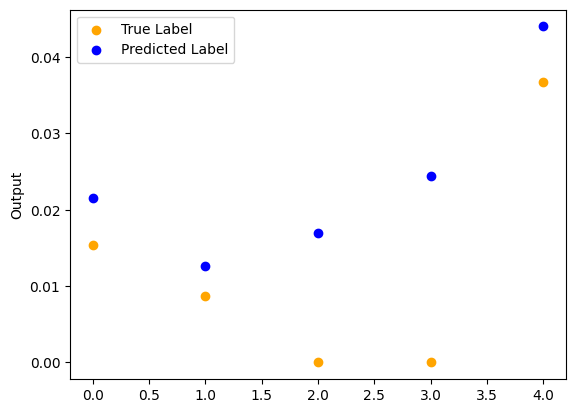

In [26]:
plt.scatter(range(len(random_test)), random_test , color="orange") # Truelabels in orange
plt.scatter(range(len(random_test)), random_pred , color="blue") # Predictedlabels in blue

plt.legend(['True Label', 'Predicted Label'])
plt.ylabel("Output")
plt.show()
